In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '../'))

In [7]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

import json
from numpy import random
from dataclasses import dataclass

from model.utils import report_results
from model.gradient_boosting import train_gradient_boosting
from model.utils import MetricsResults

from sklearn.ensemble import HistGradientBoostingClassifier

from collections import defaultdict
from functools import reduce

DEFAULT_RANDOM_SEED = 774
random.mtrand._rand.seed(DEFAULT_RANDOM_SEED)
seed_list = random.random_integers(low=0, high=2**32 - 1, size=25)
warnings.filterwarnings("ignore")

category="min_tpm_5"

In [11]:
def run_tests(genes: int, metric: str, params: dict) -> tuple[int, MetricsResults]:
  data = pd.read_csv(f"../../preprocessed/{category}/genes.csv").drop(columns=["sample_id"])
  importances = json.loads(open(f"../../preprocessed/{category}/important_genes_logistic_{metric}.json").readline())

  chosen_genes = list(set([y["gene"] for x in [sex_values[:genes] for subtype_items in importances.values() for sex_values in subtype_items.values()] for y in x]))
  print(f"Total chosen genes: {len(chosen_genes)}")

  df = data[["subtype", "sex", *chosen_genes]]
  return len(chosen_genes), report_results(df, HistGradientBoostingClassifier, params, seed_list)

In [12]:
X = []
f1_by_subtype = defaultdict(list)

for i in [*range(1, 10), *range(10, 20, 2), *range(20, 50, 5)]:
  gene_count, report = run_tests(genes=i, metric="recall", params={'l2_regularization': 0, 'max_depth': 64, 'max_features': 0.1, 'learning_rate': 0.1})

  X.append(gene_count)
  f1_series: pd.Series = reduce(lambda x, y: x + y, report.f1_by_class.overall) / float(len(report.f1_by_class.overall))
  for subtype, f1 in f1_series.to_dict().items():
    f1_by_subtype[subtype].append(f1)

Total chosen genes: 16


100%|██████████| 25/25 [08:55<00:00, 21.42s/it]


Total chosen genes: 30


100%|██████████| 25/25 [04:00<00:00,  9.63s/it]


Total chosen genes: 49


100%|██████████| 25/25 [03:37<00:00,  8.70s/it]


Total chosen genes: 66


100%|██████████| 25/25 [03:31<00:00,  8.45s/it]


Total chosen genes: 81


100%|██████████| 25/25 [12:02<00:00, 28.89s/it] 


Total chosen genes: 99


100%|██████████| 25/25 [03:30<00:00,  8.43s/it]


Total chosen genes: 118


100%|██████████| 25/25 [03:29<00:00,  8.37s/it]


Total chosen genes: 136


100%|██████████| 25/25 [12:05<00:00, 29.03s/it] 


Total chosen genes: 152


100%|██████████| 25/25 [03:28<00:00,  8.35s/it]


Total chosen genes: 168


100%|██████████| 25/25 [03:27<00:00,  8.30s/it]


Total chosen genes: 204


100%|██████████| 25/25 [03:27<00:00,  8.31s/it]


Total chosen genes: 236


100%|██████████| 25/25 [10:44<00:00, 25.77s/it]


Total chosen genes: 270


100%|██████████| 25/25 [03:29<00:00,  8.37s/it]


Total chosen genes: 303


100%|██████████| 25/25 [04:01<00:00,  9.64s/it]


Total chosen genes: 335


100%|██████████| 25/25 [04:07<00:00,  9.88s/it]


Total chosen genes: 413


100%|██████████| 25/25 [04:13<00:00, 10.15s/it]


Total chosen genes: 486


100%|██████████| 25/25 [04:19<00:00, 10.37s/it]


Total chosen genes: 565


100%|██████████| 25/25 [12:55<00:00, 31.03s/it]  


Total chosen genes: 631


100%|██████████| 25/25 [04:31<00:00, 10.86s/it]


Total chosen genes: 705


100%|██████████| 25/25 [04:37<00:00, 11.08s/it]


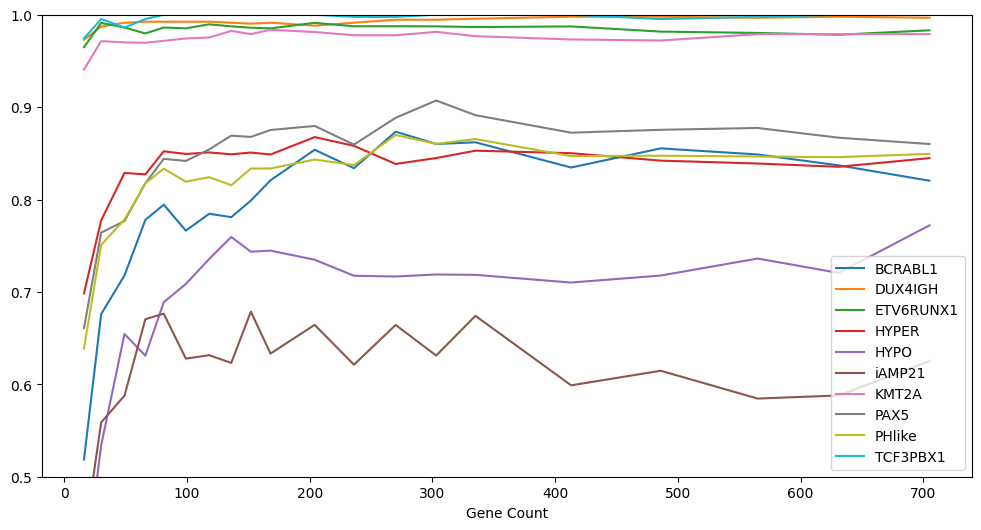

In [13]:
f = plt.figure(figsize=(12, 6))
ax = f.add_subplot()

for key in f1_by_subtype.keys():
  ax.plot(X, f1_by_subtype[key], label=key)

ax.set_xlabel("Gene Count")
ax.set_ylim([0.5, 1])
ax.legend()

### Easy to classify:
- KMT2A
- ETV6RUNX1
- DUX4IGH
- TCF3PBX1

### Medium:
- HYPER
- PAX5
- BCRABL1 (200+ genes)
- PHLike

### Hard:
- iAMP21
- HYPO

In [14]:
pd.read_csv(f"../../preprocessed/{category}/genes.csv").drop(columns=["sample_id"])["subtype"].value_counts()

subtype
ETV6RUNX1    108
HYPER         78
PHlike        77
DUX4IGH       70
KMT2A         62
PAX5          43
BCRABL1       39
HYPO          38
TCF3PBX1      36
iAMP21        20
Name: count, dtype: int64

In [15]:
X = []
f1_by_subtype = defaultdict(list)

for i in [*range(1, 10), *range(10, 20, 2), *range(20, 50, 5)]:
  gene_count, report = run_tests(genes=i, metric="f1", params={'class_weight': 'balanced', 'l2_regularization': 0.5, 'max_depth': 16, 'max_features': 0.1, 'learning_rate': 0.05})

  X.append(gene_count)
  f1_series: pd.Series = reduce(lambda x, y: x + y, report.f1_by_class.overall) / float(len(report.f1_by_class.overall))
  for subtype, f1 in f1_series.to_dict().items():
    f1_by_subtype[subtype].append(f1)

Total chosen genes: 16


100%|██████████| 25/25 [02:53<00:00,  6.92s/it]


Total chosen genes: 30


100%|██████████| 25/25 [02:39<00:00,  6.37s/it]


Total chosen genes: 49


100%|██████████| 25/25 [10:57<00:00, 26.30s/it]  


Total chosen genes: 66


100%|██████████| 25/25 [02:22<00:00,  5.71s/it]


Total chosen genes: 81


100%|██████████| 25/25 [02:18<00:00,  5.54s/it]


Total chosen genes: 99


100%|██████████| 25/25 [02:19<00:00,  5.59s/it]


Total chosen genes: 118


100%|██████████| 25/25 [02:19<00:00,  5.58s/it]


Total chosen genes: 136


100%|██████████| 25/25 [02:18<00:00,  5.52s/it]


Total chosen genes: 152


100%|██████████| 25/25 [02:14<00:00,  5.38s/it]


Total chosen genes: 168


100%|██████████| 25/25 [09:30<00:00, 22.82s/it] 


Total chosen genes: 203


100%|██████████| 25/25 [02:13<00:00,  5.35s/it]


Total chosen genes: 236


100%|██████████| 25/25 [02:14<00:00,  5.36s/it]


Total chosen genes: 269


100%|██████████| 25/25 [02:12<00:00,  5.32s/it]


Total chosen genes: 302


100%|██████████| 25/25 [02:33<00:00,  6.13s/it]


Total chosen genes: 336


100%|██████████| 25/25 [02:35<00:00,  6.21s/it]


Total chosen genes: 415


100%|██████████| 25/25 [02:41<00:00,  6.46s/it]


Total chosen genes: 488


100%|██████████| 25/25 [02:40<00:00,  6.43s/it]


Total chosen genes: 563


100%|██████████| 25/25 [02:45<00:00,  6.60s/it]


Total chosen genes: 630


100%|██████████| 25/25 [09:16<00:00, 22.28s/it] 


Total chosen genes: 704


100%|██████████| 25/25 [02:53<00:00,  6.95s/it]


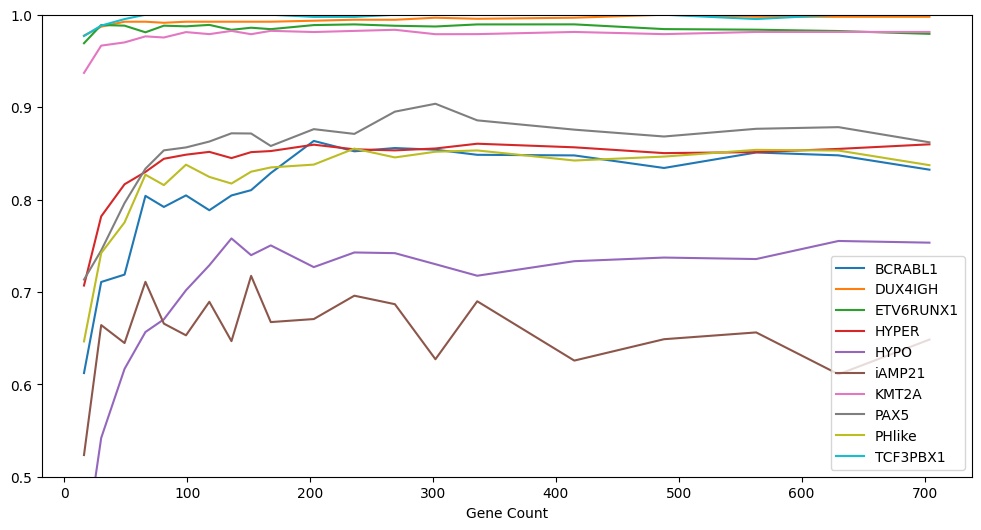

In [16]:
f = plt.figure(figsize=(12, 6))
ax = f.add_subplot()

for key in f1_by_subtype.keys():
  ax.plot(X, f1_by_subtype[key], label=key)

ax.set_xlabel("Gene Count")
ax.set_ylim([0.5, 1])
ax.legend()